# Read the tables, we have 1 per model 
# Separate the first n line and the next n and so for each num of labeled samples 
# combine
# write to csv

In [23]:
import pandas as pd 

# Location of the results csv files
baseline_prefix_str = 'baseline_1layer_MS4-200/s3l_'
results_prefix_str = 'FP5_SP_1layer_unfrozen/s3l_'
#results_prefix_str = 'XGB/s3l_'
#results_prefix_str = 'baseline_1layer/s3l_'

#model_list = ['xgb', 'dae_xgb', 'scarf_xgb', 'vime_xgb' ,'subtab_xgb', 'switchtab_xgb']
#model_list = ['3layer_mlp', '4layer_mlp']
model_list = ['dae', 'scarf', 'vime']
#model_list = ['1layer_mse_mlp', '1layer_l1loss_mlp','1layer_smoothl1loss_mlp','1layer_mape_mlp']

#num_samples_list = ['100', '1K', '10K', '20K']
num_samples_list = ['100', '250', '500', '1K', '10K', '20K']

#tasks = ['VR fragment thput.', 'VR burst thput.', 'VR fragment latency', 'VR burst latency', 
#         'UL probe latency', 
#         'DL probe latency'
#        ]
tasks = ['T 1', 'T 2', 'T 3', 'T 4', 'T 5']
task_str = ["\\textbf{T 1} & ", 
                "\\textbf{T 2} & ", 
                "\\textbf{T 3} & ", 
                "\\textbf{T 4} & ", 
                "\\textbf{T 5} & "
               ]
# Read all the results
results = {}
for model in model_list:
    results_ff = pd.read_csv(results_prefix_str+model+'_test_results.csv', delimiter=",", header=None)
    results[model] = {}
    i_start = 0
    for samp in num_samples_list:
        results[model][samp] = results_ff.iloc[i_start:i_start+len(tasks)]
        i_start = i_start + len(tasks)

# Read all the baselines
baseline = {}
for model in model_list:
    baseline_ff = pd.read_csv(baseline_prefix_str+model+'_test_results.csv', delimiter=",", header=None)
    baseline[model] = {}
    i_start = 0
    for samp in num_samples_list:
        baseline[model][samp] = baseline_ff.iloc[i_start:i_start+len(tasks)]
        i_start = i_start + len(tasks)
        
# For each error metric type 
# for each num of samples 

output_str = ''

for num_samp in num_samples_list:
    output_str = output_str + '\hline' + '\n'
    output_str = output_str + r"\multicolumn{" + str(len(model_list)+1) + r"}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = " + num_samp + r"\rule[-1ex]{0pt}{2.5ex}}\\" + '\n'
    output_str = output_str + '\hline' + '\n'
    #print('\hline')
    #print(r"\multicolumn{"+str(len(model_list)+1)+r"}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = "+num_samp+r"\rule[-1ex]{0pt}{2.5ex}}\\")
    #print('\hline')
    
    # create 3 err metric dataframnes 
    err_r2 = pd.DataFrame(index=tasks, columns=model_list).astype(float)
    err_mape = pd.DataFrame(index=tasks, columns=model_list).astype(float)
    err_mae = pd.DataFrame(index=tasks, columns=model_list).astype(float)
    gains_r2 = pd.DataFrame(index=tasks, columns=model_list).astype(float) 
    
    for model in model_list:
        # add one column at a time 
        err_mae.loc[:, model] = results[model][num_samp].iloc[:,1]
        err_mape.loc[:, model] = results[model][num_samp].iloc[:,2]
        err_r2.loc[:, model] = results[model][num_samp].iloc[:,3]
        gains_r2.loc[:, model] = results[model][num_samp].iloc[:,3] - baseline[model][num_samp].iloc[:,3]

    err_r2 = err_r2.round(3)
    err_mae = err_mae.round(3)
    err_mape = err_mape.round(3)
    gains_r2 = gains_r2.round(3)

    # CHECK HERE !!!!
    # This is a pandas data frame 
    # models are columns, tasks are rows 
    error_metric_to_print = gains_r2
    
    # Convert DataFrame to a LaTeX-friendly format
    latex_table = error_metric_to_print.apply(lambda row: ' & '.join(row.astype(str)), axis=1)
    latex_table = task_str + latex_table + ' \\\\'
    
    # Join the rows with newline characters
    latex_table_str = '\n'.join(latex_table)
    
    output_str = output_str + latex_table_str + '\n'
    #print(latex_table_str)
    
# Print with & as the delimiter to make it each to import into latex 

# Print the latex table

In [24]:
print(output_str)

\hline
\multicolumn{4}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = 100\rule[-1ex]{0pt}{2.5ex}}\\
\hline
\textbf{T 1} & 0.207 & 0.38 & 0.093 \\
\textbf{T 2} & 0.316 & 0.447 & 0.375 \\
\textbf{T 3} & 0.192 & 0.19 & 0.172 \\
\textbf{T 4} & 0.28 & 0.254 & 0.287 \\
\textbf{T 5} & 0.372 & 0.527 & 0.454 \\
\hline
\multicolumn{4}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = 250\rule[-1ex]{0pt}{2.5ex}}\\
\hline
\textbf{T 1} & 0.004 & 0.158 & 0.092 \\
\textbf{T 2} & 0.097 & 0.167 & 0.148 \\
\textbf{T 3} & 0.135 & 0.127 & 0.116 \\
\textbf{T 4} & 0.174 & 0.153 & 0.167 \\
\textbf{T 5} & 0.104 & 0.175 & 0.233 \\
\hline
\multicolumn{4}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = 500\rule[-1ex]{0pt}{2.5ex}}\\
\hline
\textbf{T 1} & 0.037 & 0.132 & 0.083 \\
\textbf{T 2} & 0.068 & 0.14 & 0.119 \\
\textbf{T 3} & 0.093 & 0.094 & 0.09 \\
\textbf{T 4} & 0.143 & 0.169 & 0.144 \\
\textbf{T 5} & -0.056 & -0.064 & -0.045 \\
\hline
\multicolumn{4}{|c|}{\rule{0pt}{2.5ex}Num. of labeled samples = 1K\rule

# Plot

5
                                          0       1      2      3
0   vrFragment_trace.txt_vr_frag_thput_mbps   0.300  2.667  0.123
1  vrFragment_trace.txt_vr_burst_thput_mbps   9.925  1.416  0.310
2         vrFragment_trace.txt_vr_frag_time  43.138  1.021  0.733
3        vrFragment_trace.txt_vr_burst_time  45.411  1.104  0.718
4                  delay_trace.txt_dl_delay  13.699  1.614  0.301
                                          0       1      2      3
5   vrFragment_trace.txt_vr_frag_thput_mbps   0.270  1.858  0.290
6  vrFragment_trace.txt_vr_burst_thput_mbps   8.955  1.357  0.416
7         vrFragment_trace.txt_vr_frag_time  38.043  0.975  0.796
8        vrFragment_trace.txt_vr_burst_time  41.144  0.977  0.770
9                  delay_trace.txt_dl_delay  10.666  1.196  0.522
                                           0       1      2      3
10   vrFragment_trace.txt_vr_frag_thput_mbps   0.259  1.618  0.344
11  vrFragment_trace.txt_vr_burst_thput_mbps   7.502  1.113  0.562
12   

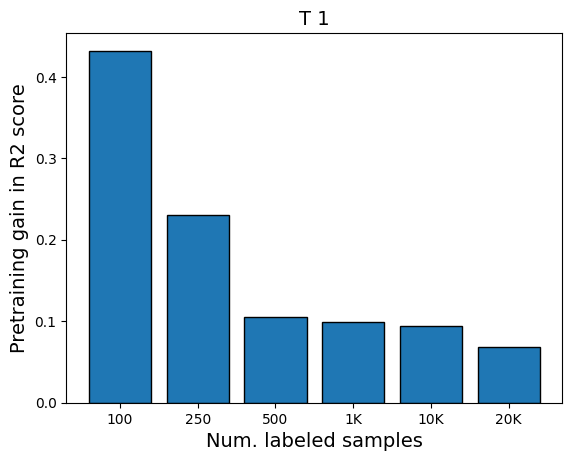

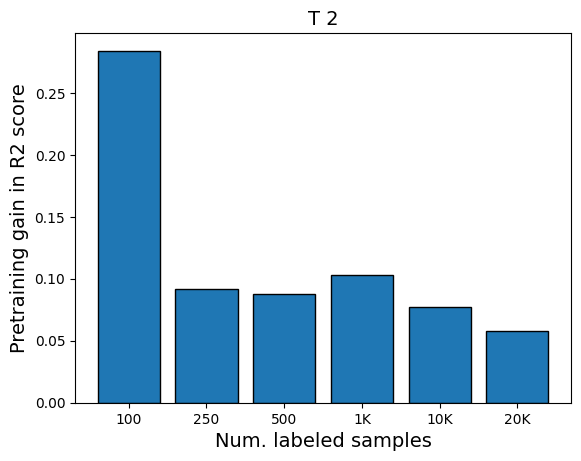

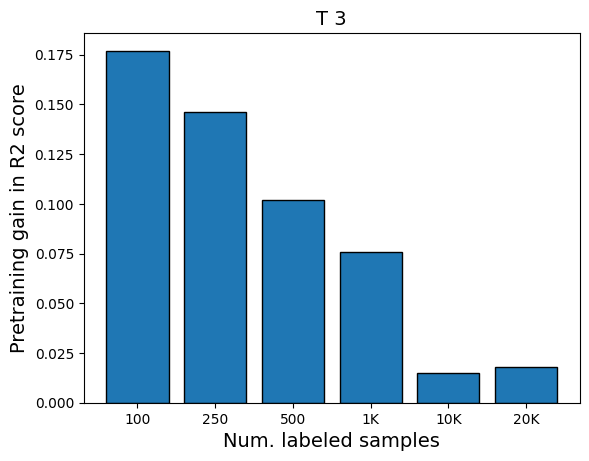

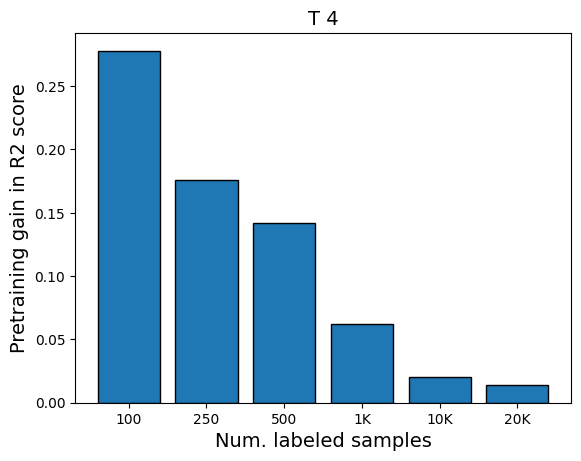

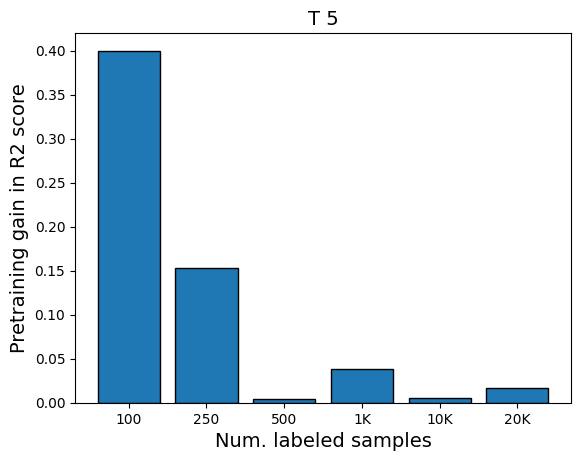

In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Location of the results csv files
baseline_prefix_str = 'baseline_1layer_MS4-200/s3l_'
results_prefix_str = 'FP2_SP_1layer_unfrozen/s3l_'

model = 'dae'

num_samples_list = ['100', '250', '500', '1K', '10K', '20K']
tasks = ['T 1', 'T 2', 'T 3', 'T 4', 'T 5']
print(len(tasks))



# Read all the results
results = {}
results_ff = pd.read_csv(results_prefix_str+model+'_test_results.csv', delimiter=",", header=None)
i_start = 0
for samp in num_samples_list:
    results[samp] = results_ff.iloc[i_start:i_start+len(tasks)]
    i_start = i_start + len(tasks)

# Read all the baselines
baseline = {}
baseline_ff = pd.read_csv(baseline_prefix_str+model+'_test_results.csv', delimiter=",", header=None)
i_start = 0
for samp in num_samples_list:
    baseline[samp] = baseline_ff.iloc[i_start:i_start+len(tasks)]
    i_start = i_start + len(tasks)
        
# For each error metric type 
# for each num of samples 
#gainz_plot_array = {task: None for task in tasks}
gainz_plot_array = np.zeros((len(tasks), len(num_samples_list)))


for n, num_samp in enumerate(num_samples_list):
    
    # create 3 err metric dataframnes 
    err_r2 = arr = np.zeros(len(tasks))
    err_mape = np.zeros(len(tasks))
    err_mae = np.zeros(len(tasks))
    gains_r2 = np.zeros(len(tasks))

    print(results[num_samp])
    
    err_mae = results[num_samp].iloc[:,1]
    err_mape = results[num_samp].iloc[:,2]
    err_r2 = results[num_samp].iloc[:,3]
    gains_r2 = results[num_samp].iloc[:,3] - baseline[num_samp].iloc[:,3]

    # save this into the finaly plotting array 
    gainz_plot_array[:,n] = gains_r2
    

# print
for t, task in enumerate(tasks):
    plt.bar(num_samples_list, gainz_plot_array[t,:], edgecolor='black')
    plt.ylim(bottom=0)
    plt.xlabel('Num. labeled samples', fontsize=14)
    plt.ylabel('Pretraining gain on R2 score', fontsize=14)
    plt.xticks(fontsize=20)
    plt.title(task, fontsize=14)
    plt.show()